# Importation des bibliothèques

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os

sns.set()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Importation de la base de données

#### Gestion des dossiers et dezipage de la base de donnée

In [3]:
"""
projet_mlops_ai
├── datasets
│   └── words
│   │   ├── a01
│   │   │   ├── a01-000u
│   │   │   │   ├── a01-000u-00-00.png
│   │   │   │   └── ...
│   │   │   └── ...
│   │   ├── a02
│   │   └── ...
│   └── annotations
│   │   └── words.txt
├── models
└── mlops.ipynb
"""

'\nprojet_mlops_ai\n├── datasets\n│   └── words\n│   │   ├── a01\n│   │   │   ├── a01-000u\n│   │   │   │   ├── a01-000u-00-00.png\n│   │   │   │   └── ...\n│   │   │   └── ...\n│   │   ├── a02\n│   │   └── ...\n│   └── annotations\n│   │   └── words.txt\n├── models\n└── mlops.ipynb\n'

In [4]:
folder_path = "/content/drive/MyDrive/projet_mlops_ai"

In [ ]:
def creerDossier(nom_dossier):
    dossier = folder_path + "/" + nom_dossier
    # Vérifie si le dossier "data" existe
    if not os.path.exists(dossier):
        # Si le dossier n'existe pas, le créer
        os.makedirs(dossier)
        print(f"Dossier {nom_dossier} créé avec succès !")
    else:
        print(f"Le dossier {nom_dossier} existe déjà.")

In [ ]:
creerDossier("datasets")
creerDossier("models")

Nous allons travailler avec le dataset words.tgz

In [ ]:
import tarfile

def dezipper_fichier_tgz(datatgz_path):
    """
    Cette fonction décompresse un fichier tgz.

    Parameters:
    datatgz_path (str): le chemin vers le fichier tgz

    Returns:
    None
    """
    # Vérifier si le fichier existe
    if not os.path.exists(datatgz_path):
        print(f"Le fichier {datatgz_path} n'existe pas.")
        return

    # Vérifier si le fichier est un fichier tgz
    if not datatgz_path.endswith('.tgz'):
        print(f"Le fichier {datatgz_path} n'est pas un fichier tgz.")
        return

    # Créer un dossier pour extraire les fichiers tgz
    dossier_extraction = os.path.splitext(datatgz_path)[0]
    os.makedirs(dossier_extraction, exist_ok=True)

    # Décompresser le fichier tgz
    with tarfile.open(datatgz_path, 'r:gz') as tar:
        tar.extractall(path=dossier_extraction)

    # Supprimer le fichier tgz
    os.remove(datatgz_path)
    print(f"Le fichier {os.path.basename(datatgz_path)} a été décompressé avec succès dans le dossier {dossier_extraction}.")

In [ ]:
datatgz_path = "/content/drive/MyDrive/projet_mlops_ai/datasets/words.tgz"

In [ ]:
dezipper_fichier_tgz(datatgz_path)

In [5]:
annotations_dir = '/content/drive/MyDrive/projet_mlops_ai/datasets/annotations'
images_dir = '/content/drive/MyDrive/projet_mlops_ai/datasets/words'

#### Importation des annotations

In [6]:
def load_annotation(filepath, size=None, random_selection=False):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    annotations = {}
    for line in lines:
        if not line.startswith('#'):
            parts = line.strip().split(' ')

            image_id = parts[0]
            bbox = list(map(int, parts[3:7]))
            ok = parts[1]
            label = parts[-1]

            if ok == 'ok':  # We only keep words that were correctly segmented
                annotations[image_id] = {'bbox': bbox, 'label': label}
            else:
                image_id_dir = image_id.split("-")[0]
                image_id_subdir = "-".join(image_id.split("-")[0:2])
                image_path = f'{images_dir}/{image_id_dir}/{image_id_subdir}/{image_id}.png'
                
                try:
                    with open(image_path, 'rb'):
                        pass
                except FileNotFoundError:
                    continue
                
                os.remove(image_path)
    
    # Select a random subset of the annotations if specified
    if random_selection:
        annotations = dict(random.sample(list(annotations.items()), size or len(annotations)))
    # Limit the size of the output dictionary if specified
    if size is not None:
        annotations = dict(list(annotations.items())[:size])
        
    return annotations

In [7]:
annotations = load_annotation(f'{annotations_dir}/words.txt', size=1000)

In [8]:
annotations

{'a01-000u-00-00': {'bbox': [408, 768, 27, 51], 'label': 'A'},
 'a01-000u-00-01': {'bbox': [507, 766, 213, 48], 'label': 'MOVE'},
 'a01-000u-00-02': {'bbox': [796, 764, 70, 50], 'label': 'to'},
 'a01-000u-00-03': {'bbox': [919, 757, 166, 78], 'label': 'stop'},
 'a01-000u-00-04': {'bbox': [1185, 754, 126, 61], 'label': 'Mr.'},
 'a01-000u-00-05': {'bbox': [1438, 746, 382, 73], 'label': 'Gaitskell'},
 'a01-000u-00-06': {'bbox': [1896, 757, 173, 72], 'label': 'from'},
 'a01-000u-01-00': {'bbox': [395, 932, 441, 100], 'label': 'nominating'},
 'a01-000u-01-01': {'bbox': [901, 958, 147, 79], 'label': 'any'},
 'a01-000u-01-02': {'bbox': [1112, 958, 208, 42], 'label': 'more'},
 'a01-000u-01-03': {'bbox': [1400, 937, 294, 59], 'label': 'Labour'},
 'a01-000u-01-04': {'bbox': [1779, 932, 174, 63], 'label': 'life'},
 'a01-000u-01-05': {'bbox': [2008, 933, 237, 70], 'label': 'Peers'},
 'a01-000u-02-00': {'bbox': [408, 1106, 65, 70], 'label': 'is'},
 'a01-000u-02-01': {'bbox': [541, 1118, 72, 54], 'l

In [9]:
len(annotations)

1000

#### Lecture des images et de leurs labels


In [10]:
def load_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.io.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image_np = image.numpy()  # convert Tensor to np array
    return image_np

In [11]:
image = load_image('/content/drive/MyDrive/projet_mlops_ai/datasets/words/a01/a01-000u/a01-000u-00-00.png')
image

array([[[0.97647065],
        [0.97647065],
        [0.96470594],
        ...,
        [0.9843138 ],
        [0.9843138 ],
        [0.9843138 ]],

       [[0.9803922 ],
        [0.97647065],
        [0.9058824 ],
        ...,
        [0.9843138 ],
        [0.9843138 ],
        [0.9843138 ]],

       [[0.9607844 ],
        [0.9450981 ],
        [0.8470589 ],
        ...,
        [0.9843138 ],
        [0.9843138 ],
        [0.9843138 ]],

       ...,

       [[0.48235297],
        [0.79215693],
        [0.9176471 ],
        ...,
        [0.36862746],
        [0.7607844 ],
        [0.91372555]],

       [[0.5568628 ],
        [0.854902  ],
        [0.94117653],
        ...,
        [0.61960787],
        [0.90196085],
        [0.9450981 ]],

       [[0.6392157 ],
        [0.91372555],
        [0.9450981 ],
        ...,
        [0.86666673],
        [0.9294118 ],
        [0.9490197 ]]], dtype=float32)

In [12]:
def load_example(word_id, annotations, images_dir):

    annotation = annotations[word_id]
    bbox = annotation['bbox']
    label = annotation['label']
    word_id_dir = word_id.split("-")[0]
    word_id_subdir = "-".join(word_id.split("-")[0:2])
    image_path = f'{images_dir}/{word_id_dir}/{word_id_subdir}/{word_id}.png'
    image = load_image(image_path)
    return image, bbox, label


In [13]:
image, bbox, label = load_example("a03-006-00-07", annotations, images_dir)

#print(image)
print(image, bbox, label)

KeyError: ignored

In [20]:
def display_images(n, annotations, images_dir, randomly=False):
    # Select a random subset of the annotations if specified
    if randomly:
        annotations = dict(random.sample(list(annotations.items()), n or len(annotations)))
    else:
        annotations = dict(list(annotations.items())[:n])
    # Display each image with its annotation
    for word_id, annotation in annotations.items():
        image, bbox, label = load_example(word_id, annotations, images_dir)
        # Display the image and its annotation
        fig, ax = plt.subplots(figsize=(3,3))
        ax.imshow(image, cmap='gray')
        ax.set_title(f'{word_id} - {label}')
        plt.show()

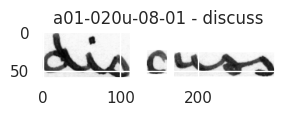

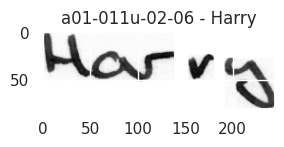

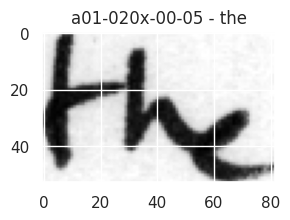

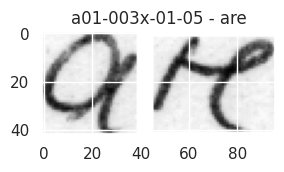

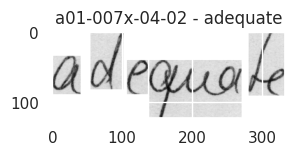

In [23]:
display_images(5, annotations, images_dir, randomly=True)

#### Séparation de la base de données en données d'entrainement, de validation et de test

#### Encodage

In [24]:
char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
print(char_list, len(char_list))

# Define the function to encode each output word into digits
def encode_to_labels(txt):
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [25]:
encode_to_labels('EPISEN')

[30, 41, 34, 44, 30, 39]

#### Séparation

In [28]:
import random
from tensorflow.keras.preprocessing import sequence
import time

def get_train_val_test_data(annotations, images_dir, test_size=0.2, val_size=0.1, random_selection=False):
    """
    Split the data into training, validation, and test sets.
    
    Args:
        annotations (dict): Dictionary of annotations.
        images_dir (str): Directory containing the images.
        test_size (float): Fraction of examples to include in the test set.
        val_size (float): Fraction of examples to include in the validation set.
        random_selection (bool): If True, examples are randomly selected for the test and validation sets.
    
    Returns:
        A tuple of tuples containing the training, validation, and test data and labels.
    """
    num_examples = len(annotations)
    
    if random_selection:
        # Randomly select examples for the test and validation sets
        test_word_ids = set(random.sample(list(annotations.keys()), int(num_examples * test_size)))
        val_word_ids = set(random.sample(list(annotations.keys() - test_word_ids), int(num_examples * val_size)))
    else:
        # Select examples in order for the test and validation sets
        test_word_ids = set(list(annotations.keys())[:int(num_examples * test_size)])
        val_word_ids = set(list(annotations.keys())[int(num_examples * test_size):int(num_examples * (test_size + val_size))])
    
    train_data, train_labels, val_data, val_labels, test_data, test_labels = [], [], [], [], [], []
    n=0
    for word_id, annotation in annotations.items():
        image, bbox, label = load_example(word_id, annotations, images_dir)

        # Encode the label into digits
        label_encoded = [char_list.index(c) for c in label]

        print(isinstance(label,str), n, label, label_encoded)
        
        if word_id in test_word_ids:
            test_data.append(image)
            test_labels.append(label)
        elif word_id in val_word_ids:
            val_data.append(image)
            val_labels.append(label)
        else:
            train_data.append(image)
            train_labels.append(label)
        n+=1

    print("fin de boucle")

    max_label_length = max([len(label) for label in train_labels + val_labels + test_labels])
    train_labels_padded = sequence.pad_sequences(train_labels, maxlen=max_label_length, padding='post', value=len(char_list))
    val_labels_padded = sequence.pad_sequences(val_labels, maxlen=max_label_length, padding='post', value=len(char_list))
    test_labels_padded = sequence.pad_sequences(test_labels, maxlen=max_label_length, padding='post', value=len(char_list))
    
    return (np.array(train_data), np.array(train_labels_padded)), (np.array(val_data), np.array(val_labels_padded)), (np.array(test_data), np.array(test_labels_padded))



In [29]:
(train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = get_train_val_test_data(annotations, images_dir, test_size=0.2, val_size=0.1, random_selection=True)

True 0 A [26]
True 1 MOVE [38, 40, 47, 30]
True 2 to [71, 66]
True 3 stop [70, 71, 66, 67]
True 4 Mr. [38, 69, 11]
True 5 Gaitskell [32, 52, 60, 71, 70, 62, 56, 63, 63]
True 6 from [57, 69, 66, 64]
True 7 nominating [65, 66, 64, 60, 65, 52, 71, 60, 65, 58]
True 8 any [52, 65, 76]
True 9 more [64, 66, 69, 56]
True 10 Labour [37, 52, 53, 66, 72, 69]
True 11 life [63, 60, 57, 56]
True 12 Peers [41, 56, 56, 69, 70]
True 13 is [60, 70]
True 14 to [71, 66]
True 15 be [53, 56]
True 16 made [64, 52, 55, 56]
True 17 at [52, 71]
True 18 a [52]
True 19 meeting [64, 56, 56, 71, 60, 65, 58]
True 20 of [66, 57]
True 21 Labour [37, 52, 53, 66, 72, 69]
True 22 put [67, 72, 71]
True 23 down [55, 66, 74, 65]
True 24 a [52]
True 25 resolution [69, 56, 70, 66, 63, 72, 71, 60, 66, 65]
True 26 on [66, 65]
True 27 the [71, 59, 56]
True 28 subject [70, 72, 53, 61, 56, 54, 71]
True 29 Griffiths [32, 69, 60, 57, 57, 60, 71, 59, 70]
True 30 , [9]
True 31 P [41]
True 32 for [57, 66, 69]
True 33 Manchester [38, 52

ValueError: ignored

In [ ]:
train_data[0]

array([[[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.9568628 ],
        [0.9686275 ],
        [0.9803922 ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.91372555],
        [0.92549026],
        [0.9450981 ]],

       [[0.9843138 ],
        [0.9843138 ],
        [0.9843138 ],
        ...,
        [0.627451  ],
        [0.7725491 ],
        [0.85098046]],

       ...,

       [[0.42352945],
        [0.3019608 ],
        [0.29411766],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.4156863 ],
        [0.32156864],
        [0.32941177],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[0.68235296],
        [0.47450984],
        [0.57254905],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]], dtype=float32)

In [ ]:
train_labels[0]

'MOVE'

# 2. Création du modèle

Nous avons construit notre Resnet avec la structure suivante :



In [59]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_resnet_model(input_shape, num_classes):
    # Load the ResNet50 model without the top layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Add a global average pooling layer and a fully connected layer
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Freeze the weights of the pretrained layers to avoid overfitting
    for layer in base_model.layers:
        layer.trainable = False
    
    # Combine the base model and the custom layers
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [68]:
#num_classes = len(set(train_labels))
num_classes = 1

In [69]:
model = create_resnet_model((128, 128, 3), num_classes)

In [70]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

Nous pouvons également visualiser le ResNet sous forme de graphe :

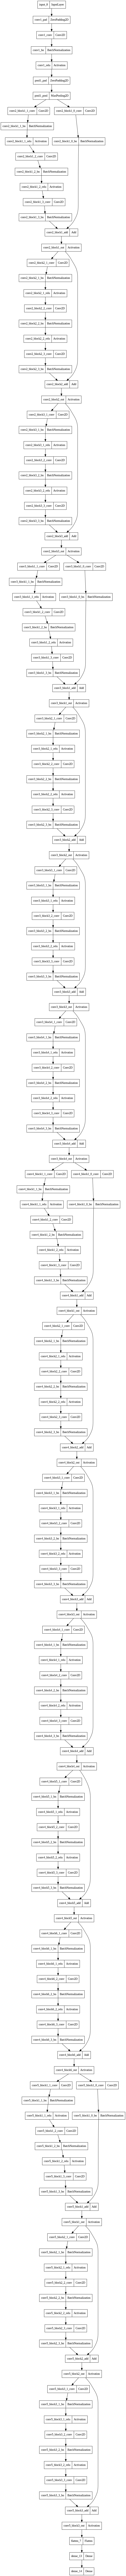

In [71]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrainement du modèle

In [76]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import cv2


# Resize your images to a fixed size (e.g. 128x128)
train_data_resized = np.array([cv2.resize(img, (128, 128)) for img in train_data])

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data_resized, train_labels, test_size=0.2)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)


# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    data_format='channels_last')

# Define training parameters
epochs = 10
batch_size = 32
learning_rate = 0.001

# Create and compile your ResNet model
model = create_resnet_model((128, 128, 3), num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: ignored

In [74]:
# Train your model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


UnimplementedError: ignored

In [60]:
history = model.fit(
    tf.data.Dataset.from_tensor_slices((train_data, train_labels))
    .shuffle(buffer_size=1024)
    .batch(32)
    .map(lambda x, y: (preprocess_input(x), y)),
    epochs=10,
    validation_data=(
        tf.data.Dataset.from_tensor_slices((val_data, val_labels))
        .batch(32)
        .map(lambda x, y: (preprocess_input(x), y))
    )
)

ValueError: ignored

In [ ]:
# Affichage des courbes de score et de perte
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training metrics')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

NameError: ignored